In [44]:
import pandas as pd

# Read in the data and print the head
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# Check how balanced the target is
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The target is fairly balanced with a slight skew towards passengers not surviving (0 = Did not survive, 1 = Survive)

In [46]:
# Remove the PassengerID column as it provides no value
df = df.drop('PassengerId', axis=1)

It is important to see how complete our data is, that is how many NaN or Null values exist in each column

In [47]:
# Count how many nulls are in each column
for col in df.columns:
    print ("{} - {}".format(col, len(df) - df[col].count()))

Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


Most of the columns are in good shape with only the Age, Cabin and Embarked columns having Nulls. Age is a numeric column, so perhaps we can use some type of imputation to fill the NaNs. This will be adressed later in the analysis.

In [73]:
# Factorize the categorical data
df['Sex'] = df['Sex'].astype('category').cat.codes # Male is 1, Female is 0
df['Embarked'] = df['Embarked'].astype('category').cat.codes

# Count of Sex values
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

Let's do some exploratory analysis of our data. Note that we will remove the age column for now as it will throw off some of our charts like the seaborn pair plot.

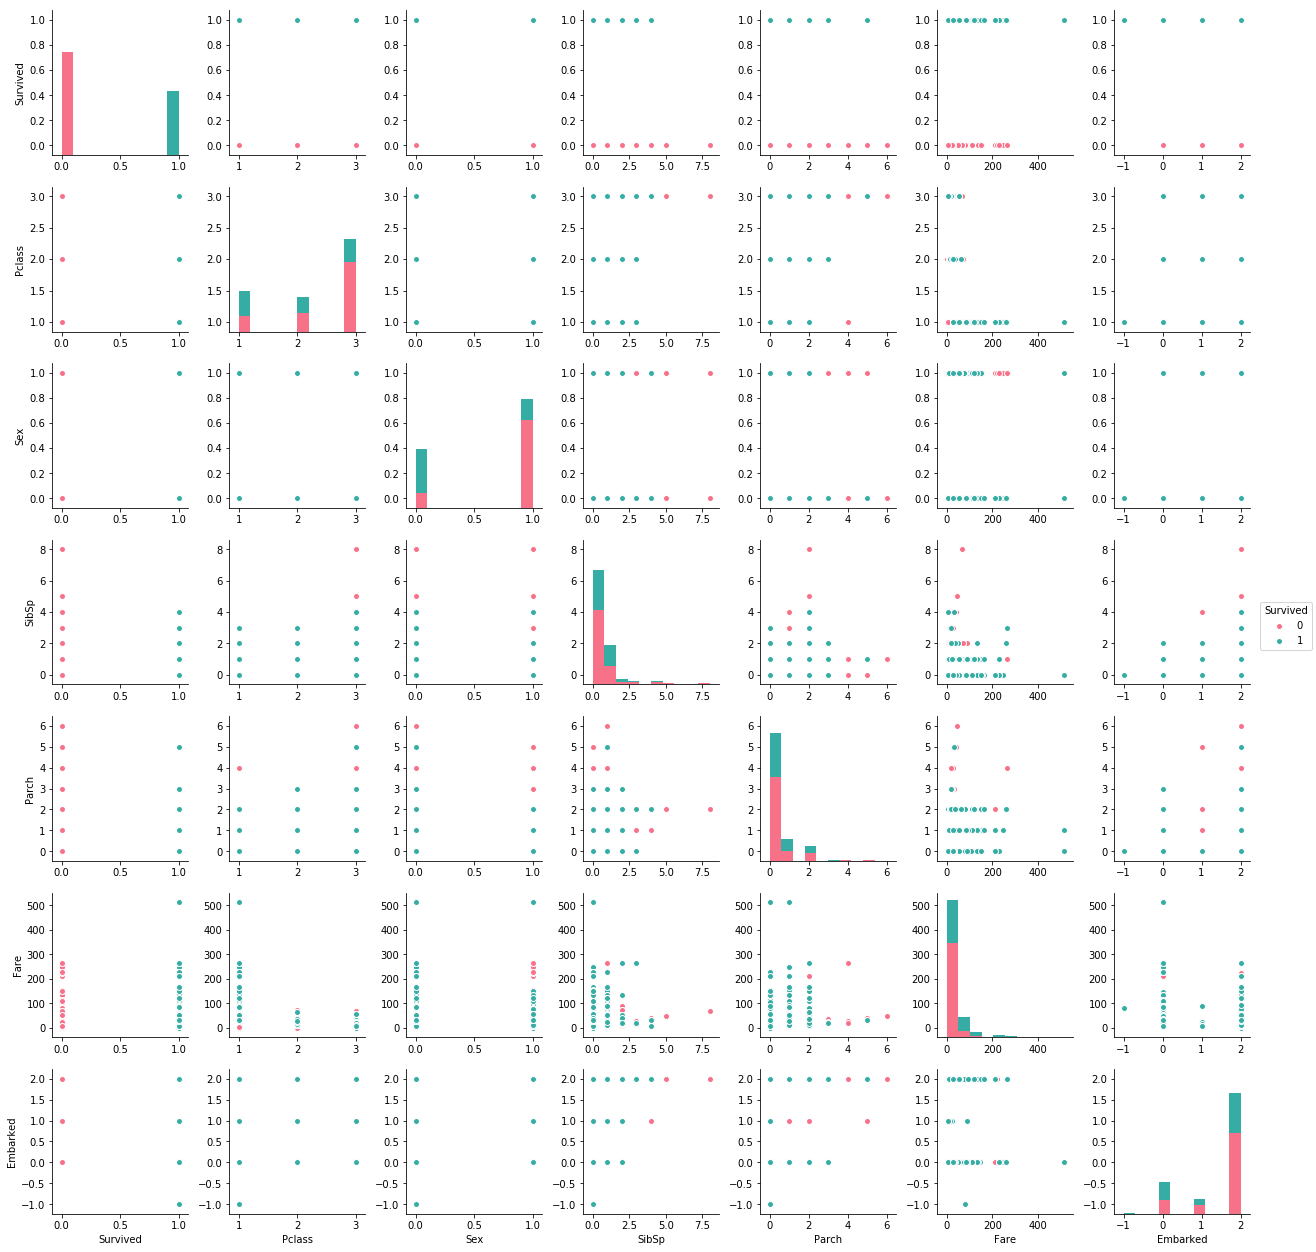

In [63]:
import seaborn as sns
df_numbers = df[['Survived', 'Pclass', 'Sex',  'SibSp', 'Parch', 'Fare', 'Embarked']]

# Create a pairplot colored by the Survived category so we can see trends in each class
sns.pairplot(df_numbers, hue='Survived', palette="husl")

##  Notes From Pairs Plot

* Sex appears to be an important. We see a much larger percentage of men did not survive
* 